In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%tensorflow_version 2.x


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [3]:


import pandas as pd
import numpy as np
import tensorflow

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers



In [4]:
tensorflow.__version__


from google.colab import drive



A. Read the ‘Data.xlsx’ as Dataframe and import required libraries.

In [4]:
drive.mount('/content/drive/')
project_path = '/content/drive/MyDrive/Data.xlsx'



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
import os

os.getcwd()

dataset_file = project_path
dataset_file

'/content/drive/MyDrive/Data.xlsx'

In [6]:
data = pd.read_excel(dataset_file)

data.head()



,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


B. Check for missing values and print percentage for each attribute.

In [7]:
#Observe the unexpected values/categories in the categorical variables carefully and impute them with the best approach
data.isna().sum
percent_missing = data.isnull().sum() * 100 / len(data)
print(' \nDurationOfPitch, Age,NumberOfTrip,MonthlyIncome has more missing value in ters of percent\n\n')
print(pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing}))

 
DurationOfPitch, Age,NumberOfTrip,MonthlyIncome has more missing value in ters of percent


                     column_name  percent_missing
Airline                  Airline         0.000000
Date_of_Journey  Date_of_Journey         0.000000
Source                    Source         0.000000
Destination          Destination         0.000000
Route                      Route         0.009362
Dep_Time                Dep_Time         0.000000
Arrival_Time        Arrival_Time         0.000000
Duration                Duration         0.000000
Total_Stops          Total_Stops         0.009362
Additional_Info  Additional_Info         0.000000
Price                      Price         0.000000


In [8]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
data = data.fillna(data.mean())
data

<ipython-input-9-e8d3a8cf2ef0>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


C. Perform univariate and bivariate analysis on the dataset.

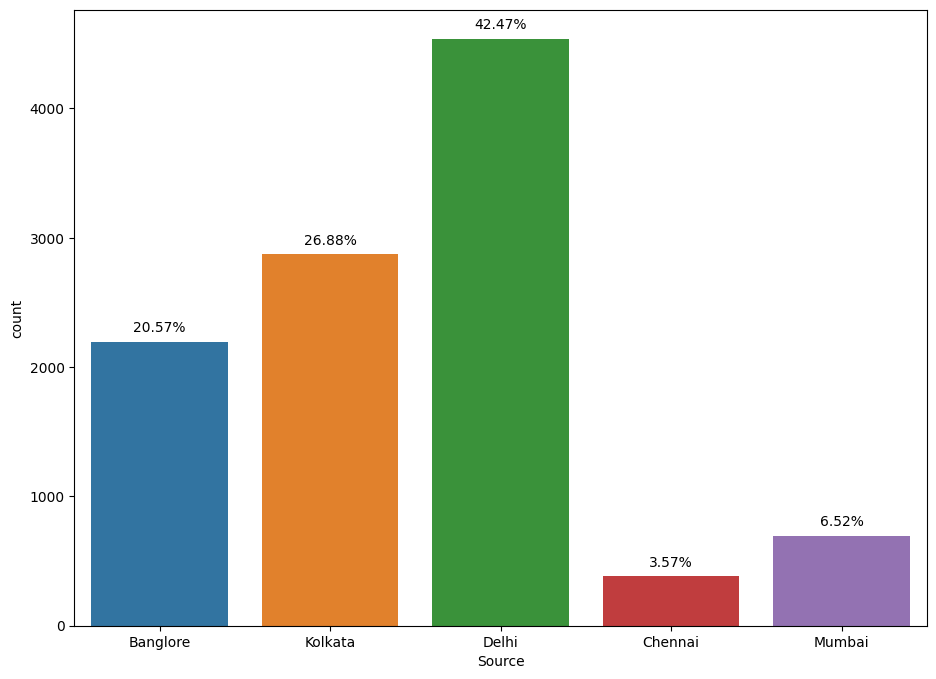

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,8))
width = len(data['Source'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = data, x= 'Source')



for p in ax.patches:
    ax.annotate(str((np.round(p.get_height()/len(data)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')



DELHI HAVING HIGHEST SOURCE FOLLOWED BY KOLKATTA AND BANGALORE

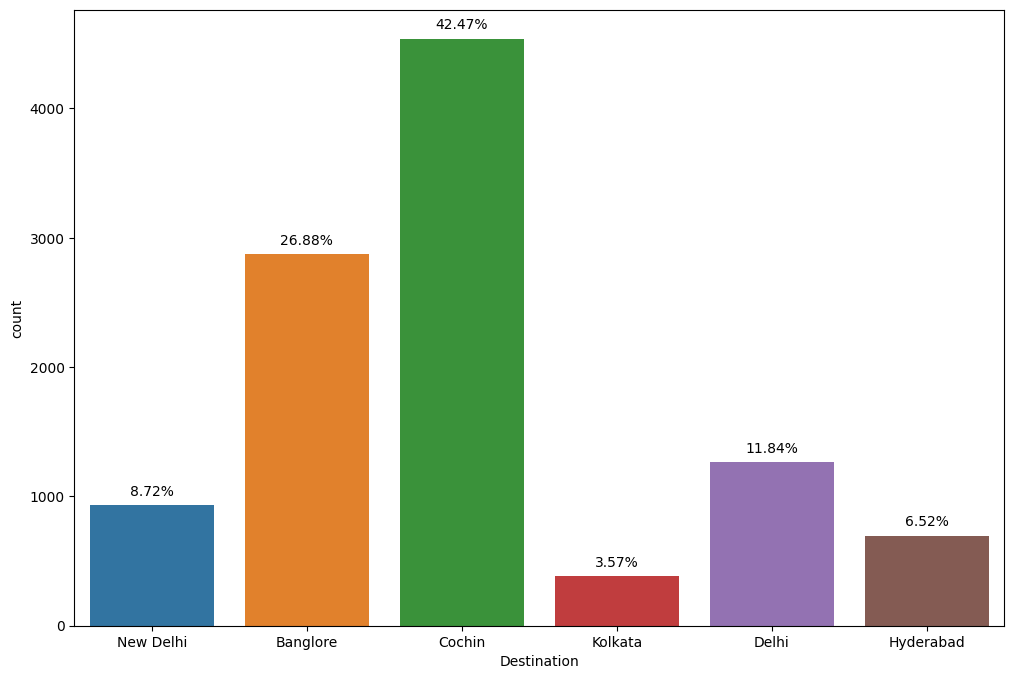

In [12]:

fig, ax = plt.subplots(figsize=(20,8))
width = len(data['Destination'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = data, x= 'Destination')



for p in ax.patches:
    ax.annotate(str((np.round(p.get_height()/len(data)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')



COCHIN HAVING HIGHEST DESTINATION FOLLOWED BY BANGALORE AND DELHI

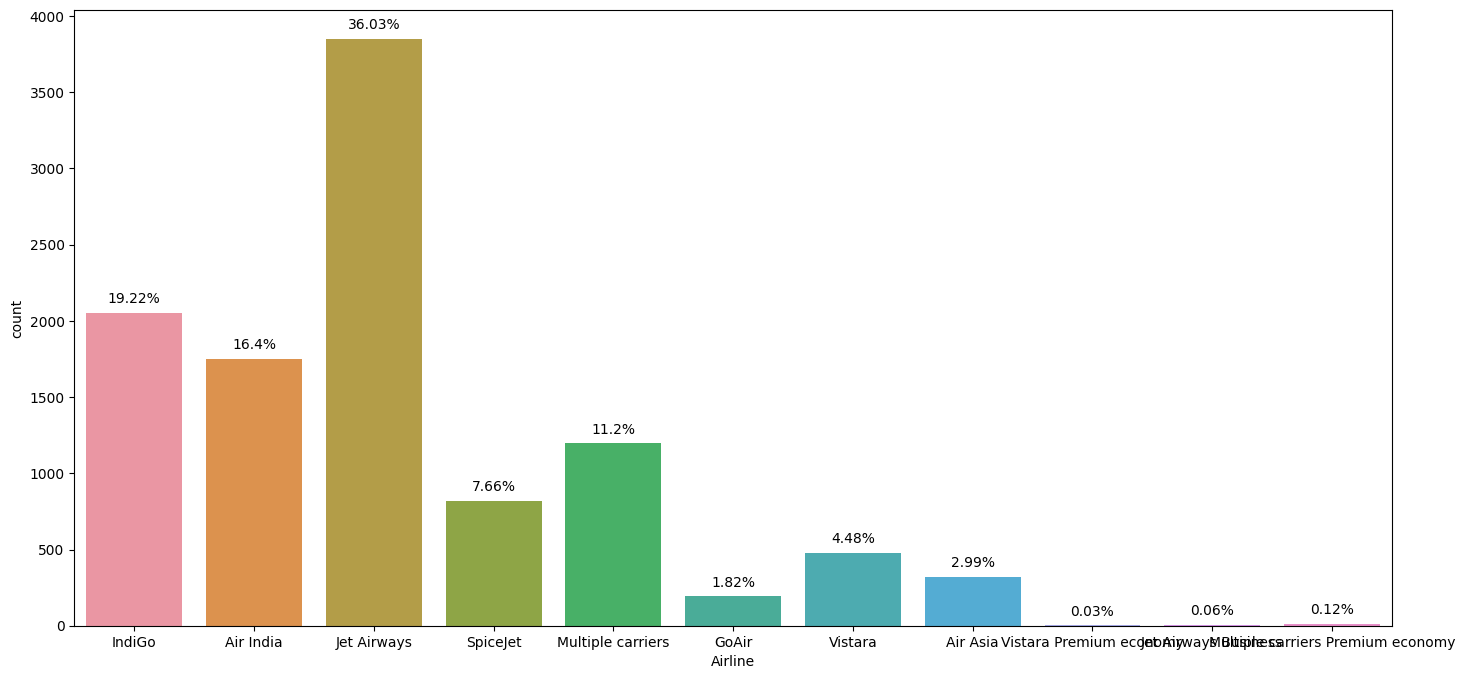

In [13]:

fig, ax = plt.subplots(figsize=(20,8))
width = len(data['Airline'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = data, x= 'Airline')



for p in ax.patches:
    ax.annotate(str((np.round(p.get_height()/len(data)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')



JET AIRWAYS AT 1ST PLACE FOLOLLOWED BY INDIGO AND AIRINDIA

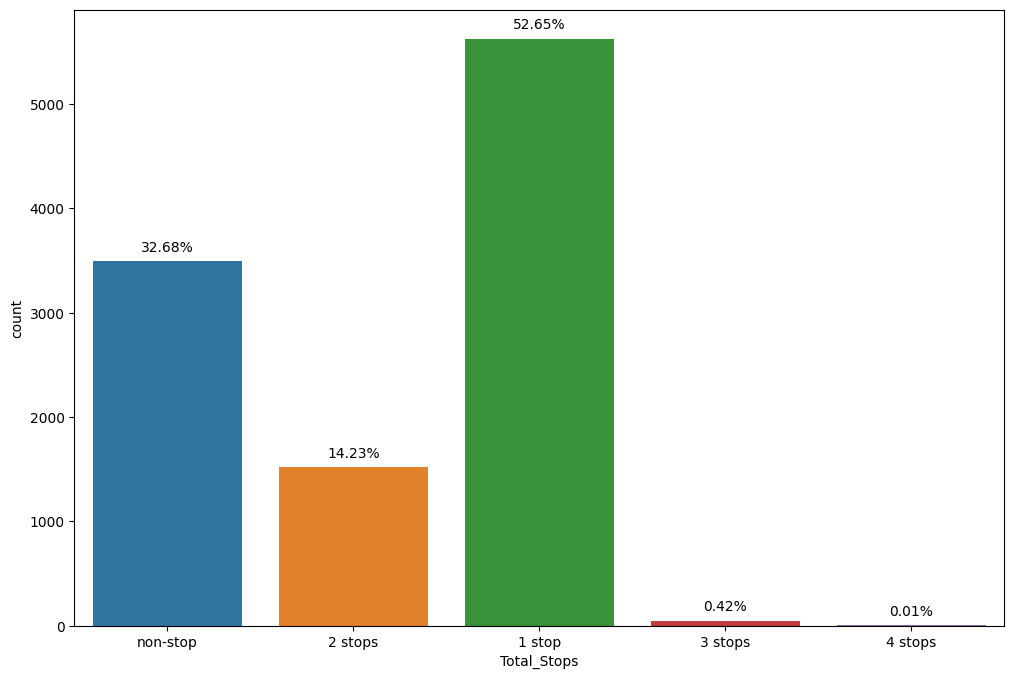

In [14]:

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,8))
width = len(data['Total_Stops'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = data, x= 'Total_Stops')



for p in ax.patches:
    ax.annotate(str((np.round(p.get_height()/len(data)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')



HIGHEST IS 1ST STOP FOLLOWED BY  NON -STOP

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10681 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10681 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


CONVERTING DATA TO USABLE FORMAT BEFORE CORRELATION

In [15]:
marks_column = data.get('Arrival_Time')
a=[]
for i in marks_column:
  a.append(i.split( ))
temp=[]
for j in a:
  temp.append(j[0])


data.insert(loc = 6,
          column = 'Arrival_Timing',
          value = temp)


In [16]:
data = data.drop(["Date_of_Journey","Additional_Info","Arrival_Time"], axis = 1)

In [17]:
data

,Airline,Source,Destination,Route,Dep_Time,Arrival_Timing,Duration,Total_Stops,Price
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,3897
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,13882
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302
...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,4107
10678,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,4145
10679,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,7229
10680,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,12648


In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from keras.models import Sequential
from keras.layers import Dense


In [19]:
le =LabelEncoder()
cols=['Route','Airline','Source','Destination','Total_Stops']
data[cols]=data[cols].apply(LabelEncoder().fit_transform)

In [20]:
for feature in data.columns: # Loop through all columns in the dataframe
    if data[feature].dtype == 'object': # Only apply for columns with categorical strings
        data[feature] = pd.Categorical(data[feature])# Replace strings with an integer


In [21]:
data.dtypes

Airline              int64
Source               int64
Destination          int64
Route                int64
Dep_Time          category
Arrival_Timing    category
Duration          category
Total_Stops          int64
Price                int64
dtype: object

In [22]:
data['Duration']=  data['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)


In [23]:
tempo1=0
tempo2=0
marks_column1 = data.get('Dep_Time')
a1=[]
for i in marks_column1:
  a1.append(i.split(":"))
temp1=[]


for j in a1:
  tempo1=int(j[0])*60
  tempo2=int(j[1])
  temp1.append(tempo1 + tempo2)

data.insert(loc = 5,
          column = 'Dep_Timing',
          value = temp1)


In [24]:
tempo1=0
tempo2=0
marks_column1 = data.get('Arrival_Timing')
a1=[]
for i in marks_column1:
  a1.append(i.split(":"))
temp1=[]


for j in a1:
  tempo1=int(j[0])*60
  tempo2=int(j[1])
  temp1.append(tempo1 + tempo2)

data.insert(loc = 6,
          column = 'Arrival_Times',
          value = temp1)

In [25]:
data = data.drop(["Dep_Time","Arrival_Timing"], axis = 1)

In [26]:

data

,Airline,Source,Destination,Route,Dep_Timing,Arrival_Times,Duration,Total_Stops,Price
0,3,0,5,18,1340,70,170,4,3897
1,1,3,0,83,350,795,445,1,7662
2,4,2,1,117,565,265,1140,1,13882
3,3,3,0,90,1085,1410,325,0,6218
4,3,0,5,29,1010,1295,285,0,13302
...,...,...,...,...,...,...,...,...,...
10677,0,3,0,63,1195,1345,150,4,4107
10678,1,3,0,63,1245,1400,155,4,4145
10679,4,0,2,18,500,680,180,4,7229
10680,9,0,5,18,690,850,160,4,12648


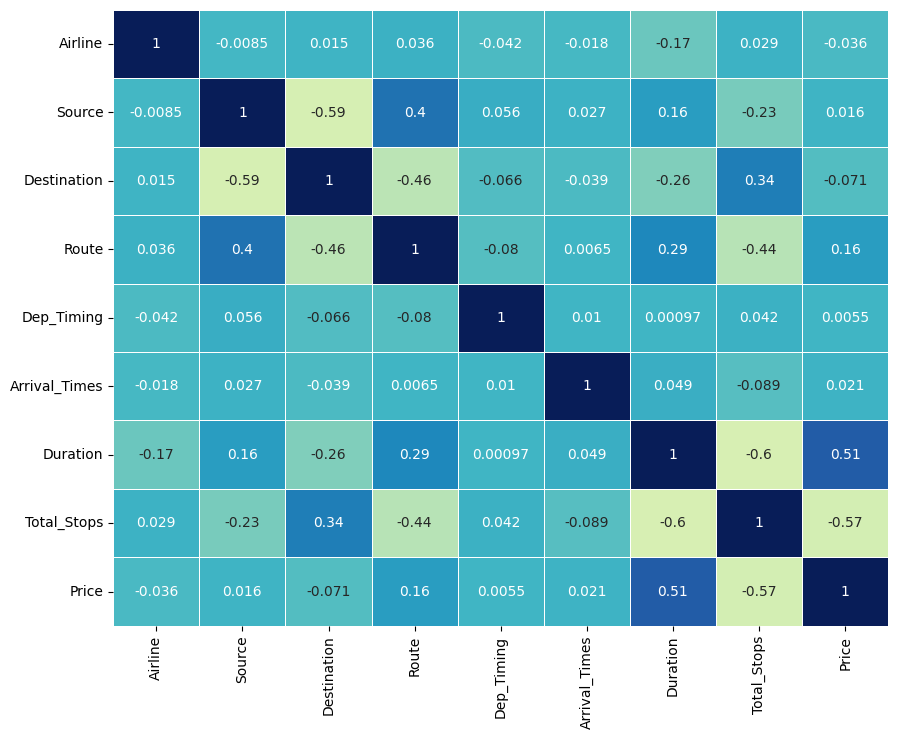

In [27]:
import seaborn as sns


plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

THERE IS SOME  POSITIVE CORRELATION BETWEEN PRICE AND DURATION ,  ROUTE AND PRICE ,DESTINATION AND TOTAL STOPS, ROUTE AND DURATION AND ROUTE AND SOURCE

THERE IS NEGATIVE CORELATION BETWEEN  SOURCE AND DESTINATION, DESTINATION AND ROUTE , AND BETWEEN  TOTAL STOPS AND ROUTE AND DURATION.

In [28]:
X_data = data.iloc[:, :-1]
y_data = data.iloc[:, -1]


A. Split the data into X & Y.

In [ ]:
PREPROCESSING DATA

In [31]:
X_data = preprocessing.normalize(X_data)

y_data = np.array(y_data)
print(y_data.shape)
y_data = np.array(y_data)
y_data.reshape(-1,1)


(10682,)


array([[ 3897],
       [ 7662],
       [13882],
       ...,
       [ 7229],
       [12648],
       [11753]])

In [33]:
print(y_data.shape)

(10682,)


D. Transform Labels into format acceptable by Neural Network

In [34]:
from sklearn.preprocessing import StandardScaler
X_data = StandardScaler().fit_transform(X_data)
y_data = StandardScaler().fit_transform(y_data.reshape(len(y_data),1))[:,0]

In [35]:
print(X_data.shape)
print(y_data.shape)

(10682, 8)
(10682,)


B. Split the data into training , validation and test with 70:20,10 proportion

C. Normalise the training ,validation and test data with appropriate method.

In [36]:





X_temp, X_test, y_temp, y_test = train_test_split(X_data,y_data, test_size=0.3,random_state=12 )
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.3,random_state=12)

Design a Neural Network to train the model.

 Train the model using appropriate parameters.

In [37]:
import tensorflow as tf
keras = tf.keras

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(256, kernel_initializer='normal',input_dim = X_train.shape[1], activation='ReLU'))

NN_model.add(Dropout(0.5))
# The Hidden Layers :
NN_model.add(Dense(128, kernel_initializer='normal',activation='ReLU'))
NN_model.add(Dropout(0.5))

NN_model.add(Dense(64, kernel_initializer='normal',activation='ReLU'))
NN_model.add(Dropout(0.5))

NN_model.add(Dense(32, kernel_initializer='normal',activation='ReLU'))
NN_model.add(Dropout(0.5))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))


optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2304      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

In [38]:
history=(NN_model.fit(X_train,y_train,validation_data=(X_val,y_val), epochs=50, batch_size=100))

Epoch 1/50
53/53 [==============================] - 3s 14ms/step - loss: 0.7167 - mean_absolute_error: 0.7167 - val_loss: 0.5487 - val_mean_absolute_error: 0.5487
Epoch 2/50
53/53 [==============================] - 0s 9ms/step - loss: 0.5763 - mean_absolute_error: 0.5763 - val_loss: 0.5132 - val_mean_absolute_error: 0.5132
Epoch 3/50
53/53 [==============================] - 0s 8ms/step - loss: 0.5553 - mean_absolute_error: 0.5553 - val_loss: 0.4967 - val_mean_absolute_error: 0.4967
Epoch 4/50
53/53 [==============================] - 0s 8ms/step - loss: 0.5486 - mean_absolute_error: 0.5486 - val_loss: 0.4930 - val_mean_absolute_error: 0.4930
Epoch 5/50
53/53 [==============================] - 0s 9ms/step - loss: 0.5419 - mean_absolute_error: 0.5419 - val_loss: 0.4946 - val_mean_absolute_error: 0.4946
Epoch 6/50
53/53 [==============================] - 0s 8ms/step - loss: 0.5355 - mean_absolute_error: 0.5355 - val_loss: 0.4952 - val_mean_absolute_error: 0.4952
Epoch 7/50
53/53 [=========

Plot 2 separate visuals.

 Training Loss and Validation Loss

In [39]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

nn_pred = NN_model.predict(X_val)
MAE = mean_absolute_error(y_val , nn_pred)
print('validation MAE = ',MAE)


71/71 [==============================] - 0s 2ms/step
validation MAE =  0.4241711013531763


101/101 [==============================] - 0s 3ms/step - loss: 0.4325 - mean_absolute_error: 0.4325
Train: 0.423, Test: 0.433


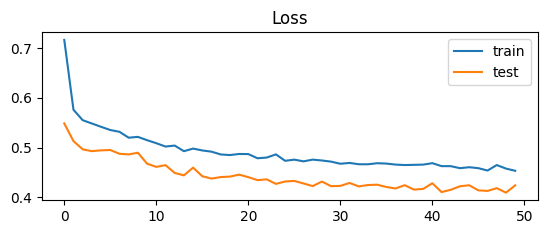

In [45]:

# evaluate the model
import matplotlib.pyplot as pyplot

_, train_acc = NN_model.evaluate(X_train, y_train)
_, test_acc = NN_model.evaluate(X_test, y_test)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()


Update existing architecture in attempt to improve the performance of the model.

In [46]:

from sklearn.metrics import mean_absolute_error
import warnings
from sklearn.ensemble import RandomForestRegressor # for building the model

warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

XGBModel = XGBRegressor()
XGBModel.fit(X_train,y_train )

Rfmodel = RandomForestRegressor()
Rfmodel.fit(X_train,y_train )

# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(X_val)

Rfpred=Rfmodel.predict(X_val)
MAE = mean_absolute_error(y_val , XGBpredictions)
print('XGBoost validation MAE = ',MAE)


MAE2 = mean_absolute_error(y_val , Rfpred)
print('random forest validation MAE = ',MAE2)

print(Rfpred)

XGBoost validation MAE =  0.3850695633975913
random forest validation MAE =  0.38905359604205986
[ 0.75171135 -0.55439147  0.89340875 ... -1.11850924  0.62463365
 -1.47614923]


HERE XG BOSST IS PERFORMING BETTER THAN RANDOM FOREST.

In [47]:
print(X_val)
print(XGBpredictions)

[[ 0.01544304  0.07007912 -0.2739422  ... -1.45380351  0.9764794
  -0.27539144]
 [ 1.15529926 -1.04528101  1.03899319 ...  0.80005505 -0.66056071
   2.01348099]
 [-0.13925656  0.42659434 -0.74760305 ...  0.86720612 -0.04627788
  -0.62516985]
 ...
 [ 2.33019226  1.29624019 -0.74760305 ...  0.70238794 -1.00210689
   1.33297454]
 [-0.13011873 -0.05610914 -0.32753067 ...  0.83746137 -0.41116755
  -0.62516985]
 [ 4.383677    3.85692386  2.37513166 ...  0.69384615 -1.01836732
   2.44950603]]
[ 0.77127224 -0.5718021   0.8792087  ... -1.1136221   0.6132727
 -1.4707935 ]


NEURAL NETWORK MODEL IS GIVING VERY LOW ERROR IN 0.45,,

LEAST MEAN ABSOLUTE ERROR IS GIVEN BY XG BOOST AT 0.35

(2244,)